# Chapter 15: K-Means Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Example Data

Text(0, 0.5, 'X2')

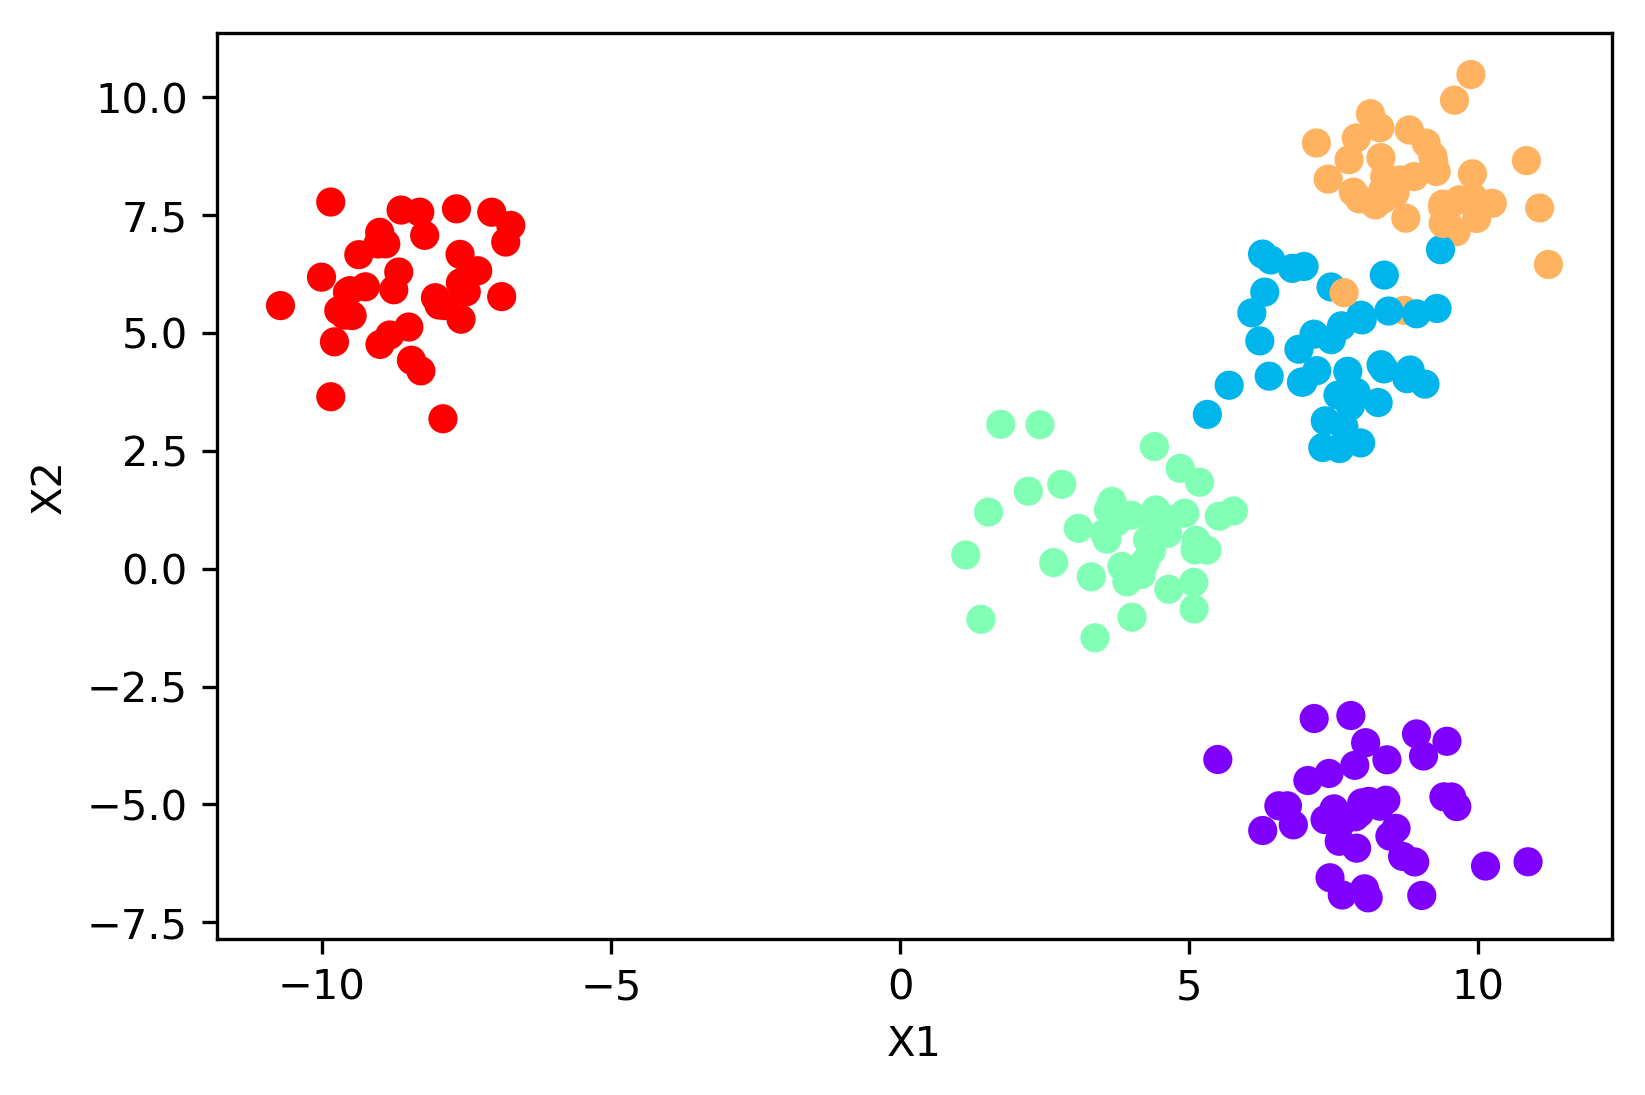

In [4]:
from sklearn.datasets import make_blobs
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=5, cluster_std=1,random_state=150)

plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
plt.xlabel("X1")
plt.ylabel('X2')

## Creating the Clusters

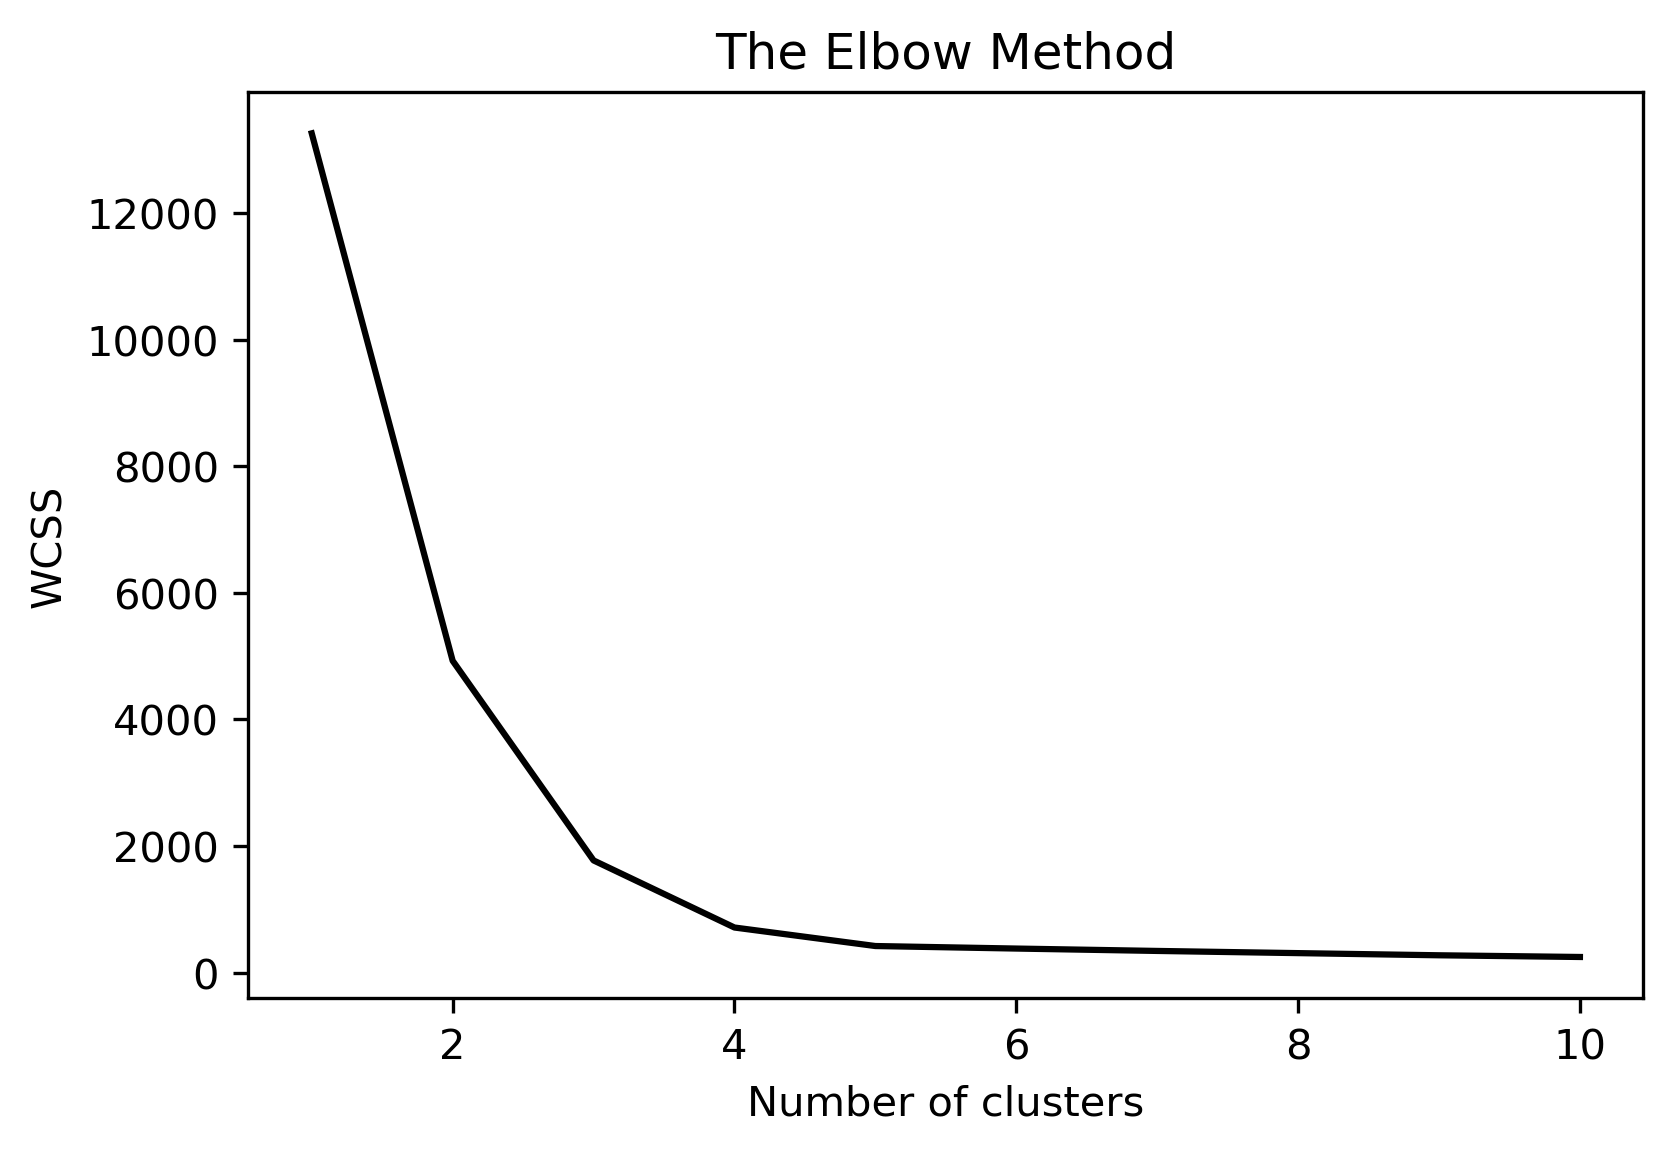

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
    kmeans.fit(data[0])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init = 'k-means++')
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

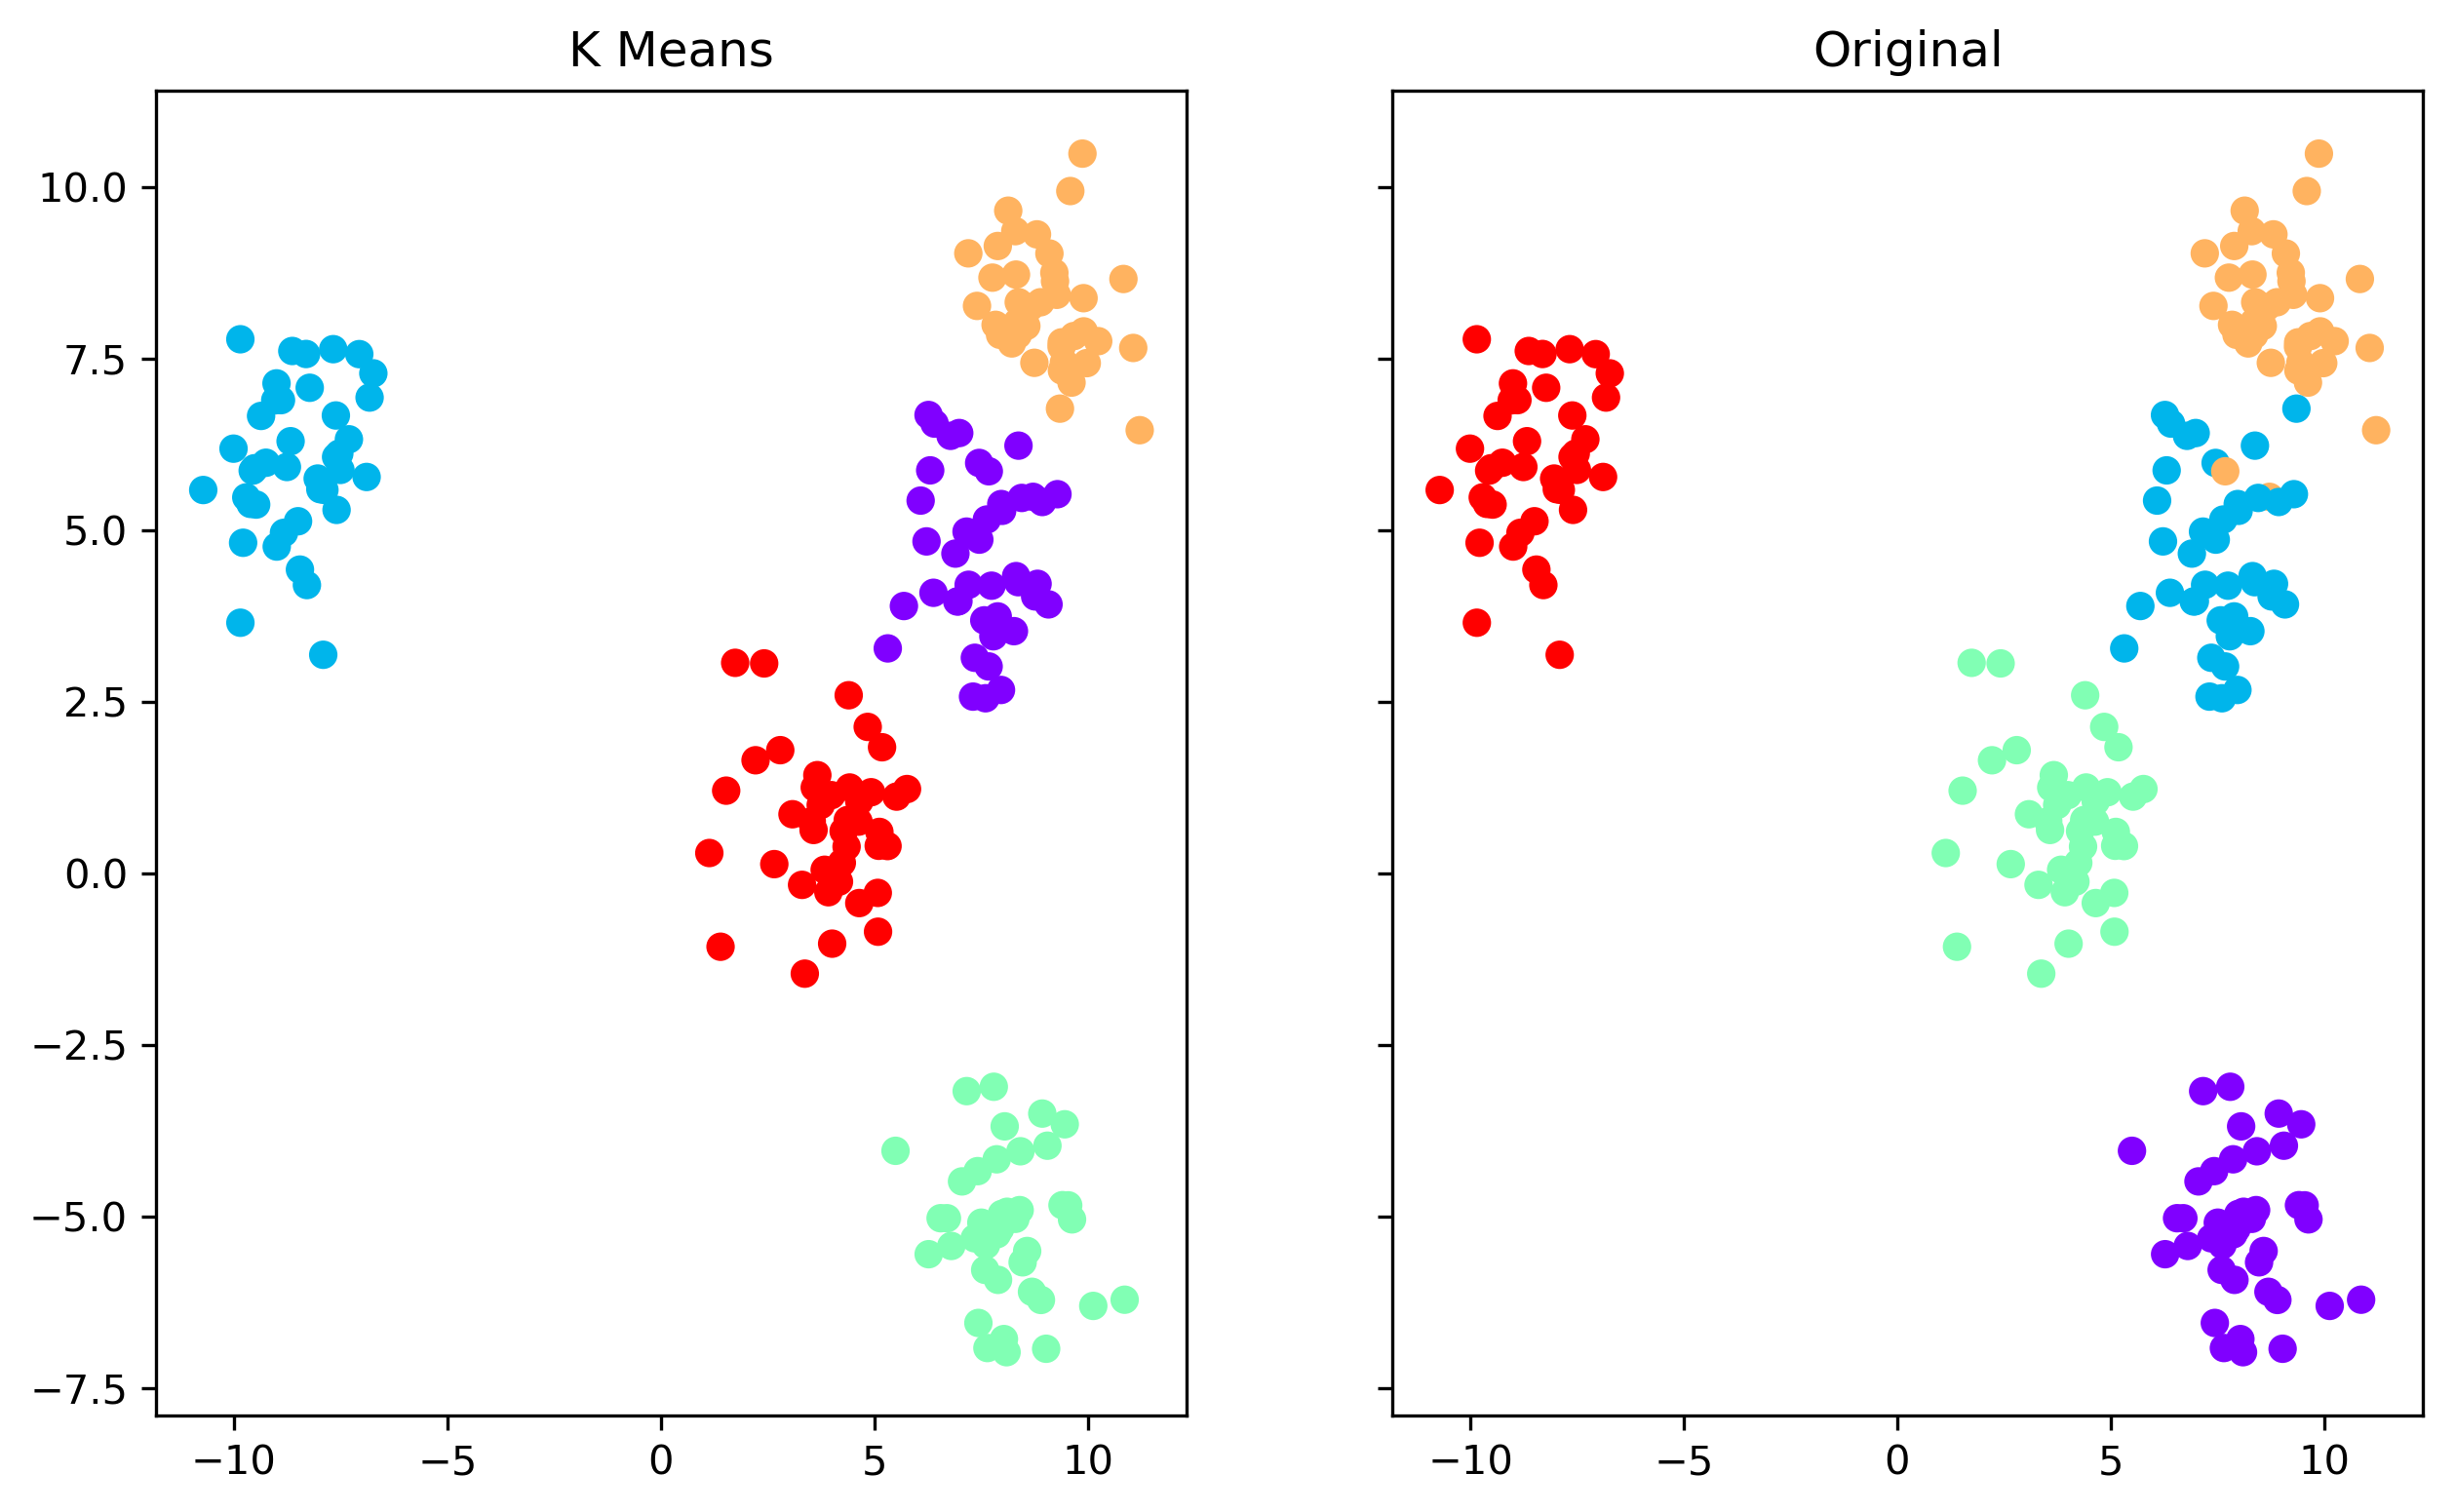

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [7]:
kmeans.cluster_centers_

array([[ 7.51724497,  4.61232782],
       [-8.53502186,  5.98022091],
       [ 8.1037214 , -5.1507853 ],
       [ 9.01735573,  8.23432609],
       [ 3.89242402,  0.72606842]])

## Case_study

In [8]:
dataset = pd.read_csv('DEGs.csv')
dataset.head()

,GB_ACC,Control_1,Control_2,Control_3,Control_4,Treated_1,Treated_2,Treated_3,Treated_4
0,NM_080863,8.163398,7.315602,7.305606,8.657140,9.642052,8.896332,9.869440,8.719047
1,BU682208,7.779391,7.172927,3.944858,6.507795,7.837943,8.327777,8.751544,7.235536
2,BC012528,8.587215,7.062856,6.277985,4.336283,8.104861,8.756223,9.707532,7.955940
3,BC036407,8.820179,9.316734,9.170426,7.210428,9.704077,10.421329,11.122569,9.643676
4,BC029869,7.830990,4.209453,6.137504,4.078951,7.001127,7.326429,8.431289,7.835419


In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Control_1,132.0,9.070583,1.278072,6.685099,8.120952,8.827167,9.985888,12.353533
Control_2,132.0,8.508938,1.767599,3.277985,7.395747,8.312169,9.699045,12.883617
Control_3,132.0,8.248652,2.001190,1.722466,7.269044,8.144647,9.618288,12.502359
Control_4,132.0,8.055377,2.197749,2.485427,6.651550,8.276980,9.548193,12.716798
Treated_1,132.0,8.402029,2.200985,1.887525,7.097323,8.735816,9.843254,12.905443
Treated_2,132.0,8.117435,2.345779,2.201634,6.638132,8.513519,9.802632,13.301425
Treated_3,132.0,8.295692,2.321438,2.201634,6.978917,8.680008,9.870595,13.024049
Treated_4,132.0,8.542134,2.100473,2.104337,7.448343,8.907190,9.726872,12.892391


In [9]:
dataset.isna().sum()

GB_ACC       0
Control_1    0
Control_2    0
Control_3    0
Control_4    0
Treated_1    0
Treated_2    0
Treated_3    0
Treated_4    0
dtype: int64

In [10]:
new_data=dataset.iloc[:,5:]
new_data.head()

,Treated_1,Treated_2,Treated_3,Treated_4
0,9.642052,8.896332,9.869440,8.719047
1,7.837943,8.327777,8.751544,7.235536
2,8.104861,8.756223,9.707532,7.955940
3,9.704077,10.421329,11.122569,9.643676
4,7.001127,7.326429,8.431289,7.835419


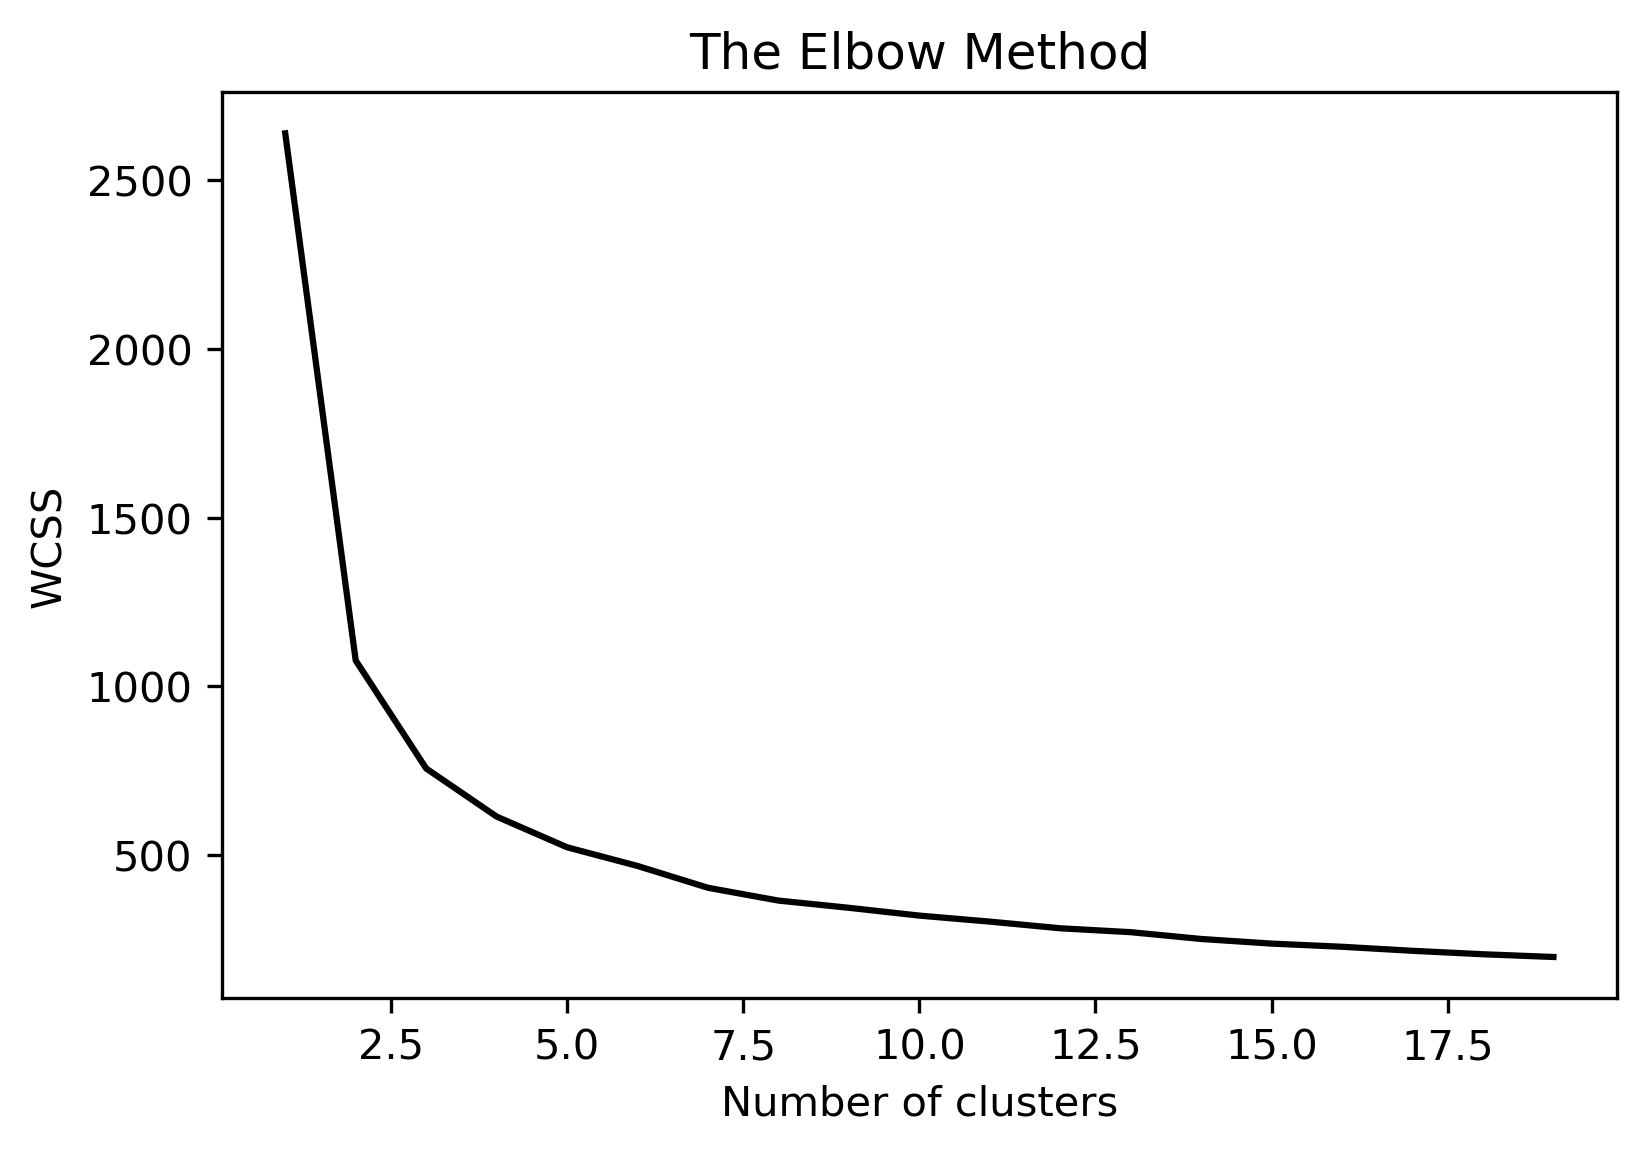

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,init = 'k-means++')
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([7, 4, 4, 0, 4, 0, 6, 7, 6, 4, 1, 4, 7, 0, 0, 7, 7, 0, 7, 7, 0, 1,
       4, 6, 6, 0, 7, 7, 7, 0, 0, 3, 0, 4, 4, 4, 7, 7, 7, 6, 0, 6, 4, 7,
       7, 0, 0, 4, 7, 6, 4, 4, 7, 7, 0, 0, 7, 4, 7, 4, 7, 7, 6, 7, 7, 4,
       4, 3, 6, 5, 0, 3, 3, 1, 2, 5, 5, 3, 2, 7, 2, 3, 1, 7, 4, 1, 2, 4,
       4, 4, 2, 1, 0, 4, 5, 5, 2, 4, 1, 4, 7, 4, 0, 2, 4, 4, 1, 3, 0, 3,
       4, 1, 4, 5, 2, 7, 7, 4, 4, 1, 1, 1, 0, 3, 1, 4, 3, 5, 3, 5, 2, 5])

In [14]:
cluster_genes = pd.concat([dataset.iloc[:,0],pd.DataFrame(kmeans.labels_)],axis=1)
cluster_genes.columns= ['GB_ACC','Groups']
cluster_genes.head()

,GB_ACC,Groups
0,NM_080863,7
1,BU682208,4
2,BC012528,4
3,BC036407,0
4,BC029869,4


In [15]:
cluster = cluster_genes.groupby('Groups')
cluster.describe()


GB_ACC                       
        count unique        top freq
Groups                              
0          20     20   AW136983    1
1          13     13   BC028111    1
2           9      9  NM_016619    1
3          11     11   AI732427    1
4          32     32  NM_004472    1
5           9      9   AI732331    1
6           9      9     D84109    1
7          29     29   BE379761    1

In [16]:
cluster = {k: v for k, v in cluster_genes.groupby('Groups')}
cluster[3]

,GB_ACC,Groups
31,AK024158,3
67,AW166562,3
71,AF397394,3
72,BC029828,3
77,BC040953,3
81,NM_006430,3
107,AL136919,3
109,AL136607,3
123,AW966184,3
126,BF446723,3
